In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input, Flatten, Activation, PReLU
from tensorflow.keras.losses import MeanSquaredLogarithmicError, MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.activations import linear, relu
from tensorflow.keras.metrics import MeanSquaredLogarithmicError, MeanAbsolutePercentageError, RootMeanSquaredError

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import sqrt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
%%time
cat = [f'col_{i}' for i in range(1, 117)]
con = [f'col_{i}' for i in range(117, 131)]
for c in cat:
    train_df[c] = train_df[c].astype('category')
    test_df[c] = test_df[c].astype('category')
    train_df[c] = train_df[c].cat.codes
    test_df[c] = test_df[c].cat.codes
del c
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

train_df['target'] = train_df['target'].apply(lambda x: np.log10(x))

Wall time: 9.2 s


In [4]:
X = train_df.iloc[:,train_df.columns != 'target'].values
y = train_df.iloc[:,train_df.columns == 'target'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)
del X, y

In [6]:
activation_fn = 'relu'
model = Sequential()
# Input Layer
model.add(Input(shape=(130,)))

# First Hidden Layer
model.add(Dense(130, activation=activation_fn))

# Second Hidden Layer
model.add(Dense(260, activation=activation_fn))
model.add(Dropout(.2))

# Third Hidden Layer
model.add(Dense(130, activation=activation_fn))
model.add(Dropout(.2))

# Fourth Hidden Layer
model.add(Dense(65, activation=activation_fn))
model.add(Dropout(.1))

# Output Layer
model.add(Dense(1, activation=linear))
model.compile(optimizer=RMSprop(learning_rate=1e-3), loss='msle', metrics=[MeanSquaredLogarithmicError(name='msle'), 'mape', RootMeanSquaredError(name='rmse'), 'mae', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 130)               17030     
_________________________________________________________________
dense_1 (Dense)              (None, 260)               34060     
_________________________________________________________________
dropout (Dropout)            (None, 260)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 130)               33930     
_________________________________________________________________
dropout_1 (Dropout)          (None, 130)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 65)                8515      
_________________________________________________________________
dropout_2 (Dropout)          (None, 65)                0

In [13]:
msle_history = []
mse_history = []
mae_history = []

In [ ]:
%%time
init_epochs = 0
epochs_now = 100
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
msle_history += history.history['msle']
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'final/model_{epochs_now}.h5')

Epoch 1/100
1957/2980 [==================>...........] - ETA: 2s - loss: 0.0461 - msle: 0.0461 - mape: 20.6265 - rmse: 2.1896 - mae: 0.6813 - mse: 4.7945

In [9]:
%%time
init_epochs = 100
epochs_now = 500
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
msle_history += history.history['msle']
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'final/model_{epochs_now}.h5')

Epoch 101/500


AttributeError: in user code:

    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\compile_utils.py:187 __call__
        self.build(y_pred)
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\compile_utils.py:140 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\nest.py:635 map_structure
        structure[0], [func(*x) for x in entries],
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\nest.py:635 <listcomp>
        structure[0], [func(*x) for x in entries],
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\compile_utils.py:265 _get_loss_object
        loss_name = loss.__name__

    AttributeError: 'MeanSquaredLogarithmicError' object has no attribute '__name__'


In [10]:
%%time
init_epochs = 500
epochs_now = 1000
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
msle_history += history.history['msle']
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'final/model_{epochs_now}.h5')

Epoch 501/1000


AttributeError: in user code:

    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\compile_utils.py:187 __call__
        self.build(y_pred)
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\compile_utils.py:140 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\nest.py:635 map_structure
        structure[0], [func(*x) for x in entries],
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\nest.py:635 <listcomp>
        structure[0], [func(*x) for x in entries],
    C:\Users\alvyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\compile_utils.py:265 _get_loss_object
        loss_name = loss.__name__

    AttributeError: 'MeanSquaredLogarithmicError' object has no attribute '__name__'


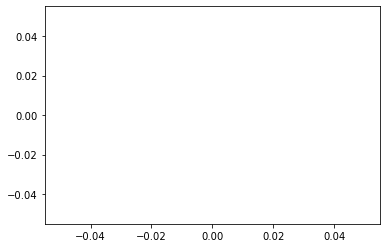

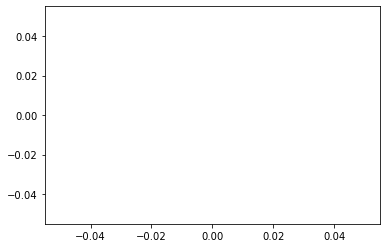

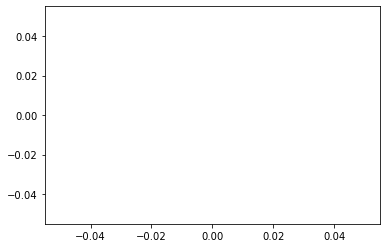

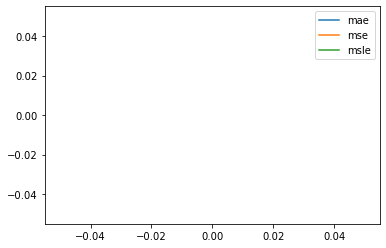

In [11]:
plt.plot(mae_history, label='mae')
plt.show()
plt.plot(mse_history, label='mse')
plt.show()
plt.plot(msle_history, label='msle')
plt.show()
plt.plot(mae_history, label='mae')
plt.plot(mse_history, label='mse')
plt.plot(msle_history, label='msle')
plt.legend()
plt.show()